# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

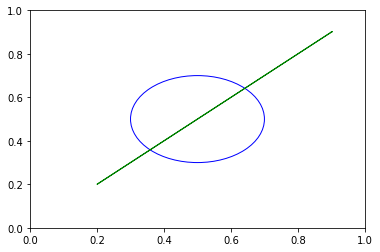

In [18]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

circle = plt.Circle((0.5, 0.5), 0.2, color='blue', fill=False)
fig, ax = plt.subplots()

plt_cricle = ax.add_artist(circle)

plt.arrow(.2,.2,.7,.7, color='g')

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Because they have multiple outputs for one input, this means the function is not consistant and considered faulty for most cases. 

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}


Functions
- Relation 2 , each input gives exactly 1 output 


# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

Domain of the input is 3

4 dementional range, 3 dementional output?


## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.
I tihnk you could but it wouldn't be very helpful, it would be like fitting a 2d scatter plot with a 3d graph one of the vectors would be dependent having a span of a plane in 3d space


# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

\begin{align}
p =\begin{bmatrix} 1&3\\-1&2\end{bmatrix}  
\\
\\
q= \begin{bmatrix}4&1&2\\-1&2&3\\5&1&-2\end{bmatrix}
\end{align}



## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

\begin{align}
\begin{bmatrix}4&1&2\\-1&2&3\\5&1&-2\end{bmatrix}\begin{bmatrix}1\\5\\-3\end{bmatrix}
\\
\begin{bmatrix}(1\times4)+(5\times1)+(-3\times2)\\(1\times-1)+(5\times2)+(-3\times3)\\(1\times5)+(5\times1)+(-3\times-2)\end{bmatrix}=\begin{bmatrix}3\\0\\16\end{bmatrix}
\end{align}



In [22]:
input_matrix = np.array([[1],[5],[-3]])
transformation_matrix = np.array([[4,1,2],[-1,2,3],[5,1,-2]])

np.matmul(transformation_matrix, input_matrix)


array([[ 3],
       [ 0],
       [16]])

# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

### If there are eigenvectors in the transformation you want to do it's a lot easier to scale the eigenvectors rather than doing the full transformation 

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?
As features grow the more data you need to generalize accurately. 

It costs more computing power to do calculations 

You don't know what really matters and what could be omited 



## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

### you should have 5 times the obsevations as you have parameters 

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [69]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris.species.unique()
y = np.array(['setosa','versicolor','virginica'])

iris = iris.drop('species', axis=1)

X = np.asarray(iris)

means = np.mean(X.T, axis=1)
centered_data = X - means

covariance_matrix = np.cov(centered_data.T)
print("\n Covariance Matrix: \n", covariance_matrix)

values, vectors = np.linalg.eig(covariance_matrix)
print("\n Eigenvectors: \n", vectors)
print("\n Eigenvalues: \n", values)

P = vectors.T.dot(centered_data.T)
print("\n Projected Data: \n", P.T)


 Covariance Matrix: 
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]

 Eigenvectors: 
 [[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]

 Eigenvalues: 
 [4.22484077 0.24224357 0.07852391 0.02368303]

 Projected Data: 
 [[-2.68420713e+00 -3.26607315e-01 -2.15118370e-02  1.00615724e-03]
 [-2.71539062e+00  1.69556848e-01 -2.03521425e-01  9.96024240e-02]
 [-2.88981954e+00  1.37345610e-01  2.47092410e-02  1.93045428e-02]
 [-2.74643720e+00  3.11124316e-01  3.76719753e-02 -7.59552741e-02]
 [-2.72859298e+00 -3.33924564e-01  9.62296998e-02 -6.31287327e-02]
 [-2.27989736e+00 -7.47782713e-01  1.74325619e-01 -2.71468037e-02]
 [-2.82089068e+00  8.21045110e-02  2.64251085e-01 -5.00996251e-0

In [68]:
from sklearn.decomposition import PCA
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
iris = iris.drop('species',axis=1)

X = np.asarray(iris)

pca = PCA(2)
pca.fit(X)

# access values and vectors
print("\n Eigenvectors: \n", pca.components_)
print("\n Eigenvalues: \n",pca.explained_variance_)

# transform data
B = pca.transform(X)
print("\n Projected Data: \n", B)


 Eigenvectors: 
 [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]

 Eigenvalues: 
 [4.22484077 0.24224357]

 Projected Data: 
 [[-2.68420713  0.32660731]
 [-2.71539062 -0.16955685]
 [-2.88981954 -0.13734561]
 [-2.7464372  -0.31112432]
 [-2.72859298  0.33392456]
 [-2.27989736  0.74778271]
 [-2.82089068 -0.08210451]
 [-2.62648199  0.17040535]
 [-2.88795857 -0.57079803]
 [-2.67384469 -0.1066917 ]
 [-2.50652679  0.65193501]
 [-2.61314272  0.02152063]
 [-2.78743398 -0.22774019]
 [-3.22520045 -0.50327991]
 [-2.64354322  1.1861949 ]
 [-2.38386932  1.34475434]
 [-2.6225262   0.81808967]
 [-2.64832273  0.31913667]
 [-2.19907796  0.87924409]
 [-2.58734619  0.52047364]
 [-2.3105317   0.39786782]
 [-2.54323491  0.44003175]
 [-3.21585769  0.14161557]
 [-2.30312854  0.10552268]
 [-2.35617109 -0.03120959]
 [-2.50791723 -0.13905634]
 [-2.469056    0.13788731]
 [-2.56239095  0.37468456]
 [-2.63982127  0.31929007]
 [-2.63284791 -0.19007583]
 [-2.588

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)